In [ ]:
!python -m venv yolov7-env
!yolov7-env\Scripts\activate
!git clone https://github.com/WongKinYiu/yolov7.git
!cd yolov7
!pip install -r requirements.txt

from data folder "data/data_YOLO" copy all files to "/yolov7/data"

In [3]:
import os
os.chdir(r"yolov7")
print("Current Directory:", os.getcwd())

Current Directory: c:\Users\dexia\Desktop\YOLO_detection\yolov7


In [3]:
import os
os.system('taskkill /IM tensorboard.exe /F')

128

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs/train --port=6006

# training based on YOLO v7

In [7]:
!python -u train.py --img 1280 --batch 4 --epochs 300 --data data/imu.yaml --cfg cfg/training/yolov7-custom.yaml --weights yolov7.pt --device 0 --workers 8


^C


wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)

autoanchor: Analyzing anchors... anchors/target = 1.50, Best Possible Recall (BPR) = 1.0000
                 all           5           0           0           0           0           0
                 all           5           0           0           0           0           0
                 all           5           0           0           0           0           0


YOLOR  v0.1-128-ga207844 torch 2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16379.5MB)

Namespace(weights='yolov7.pt', cfg='cfg/training/yolov7-custom.yaml', data='data/imu.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=300, batch_size=4, img_size=[1280, 1280], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='exp', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs\\train\\exp', total_batch_size=4)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mom

# continue training(Optional)



In [ ]:
!python -u train.py --img 1280 --batch 4 --epochs 100 --data data/imu.yaml --cfg cfg/training/yolov7-custom.yaml --weights runs/train/exp13/weights/last.pt --device 0 --workers 8

^C


# PLOT

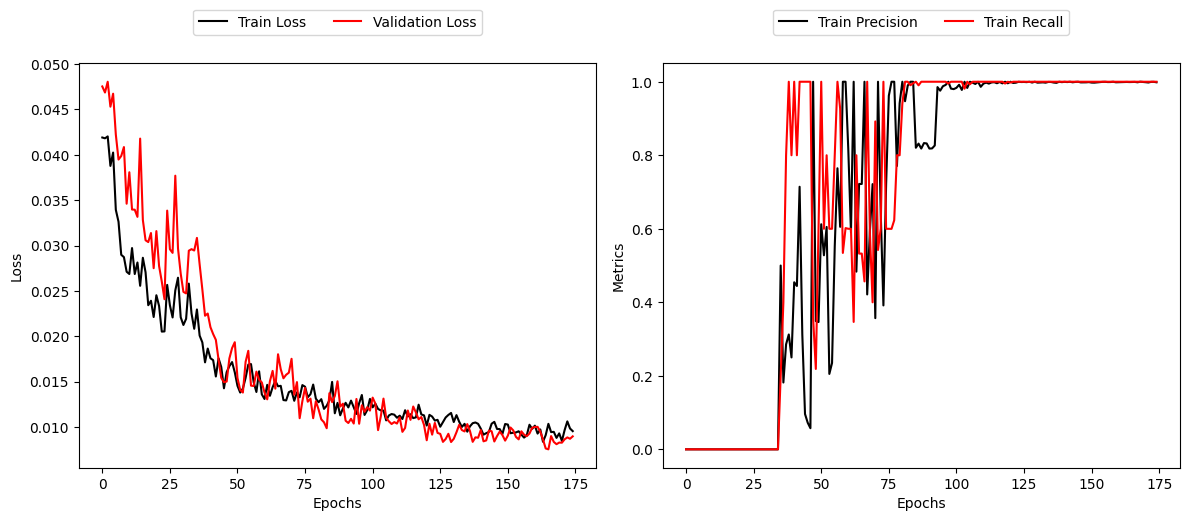

In [4]:
import matplotlib.pyplot as plt

def plot_train_val_metrics(file_path):
    # Define lists to store data
    epochs = []           # Epochs
    train_loss = []       # Training loss
    val_loss = []         # Validation loss
    precision = []        # Training precision
    recall = []           # Training recall

    # Read file content
    with open(file_path, 'r') as file:
        for line in file:
            # Skip empty lines or lines that do not contain epoch information
            if '/' not in line or not line.strip():
                continue
            
            # Parse data from each line in the file
            values = line.strip().split()
            if len(values) < 14:  # Ensure the line contains complete information
                continue

            try:
                # Extract epoch information
                epoch_info = values[0].split('/')
                epochs.append(int(epoch_info[0]))  # Current epoch
                
                # Extract training loss and validation loss
                train_loss.append(float(values[2]))  # 4th column: training loss
                val_loss.append(float(values[12]))   # 13th column: validation loss
                
                # Extract training precision and recall
                precision.append(float(values[8]))  # Precision
                recall.append(float(values[9]))     # Recall
            except ValueError:
                continue  # Skip if there is a formatting issue in a line

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # Plot training loss and validation loss
    axes[0].plot(epochs, train_loss, label="Train Loss", color='black', linestyle='-')
    axes[0].plot(epochs, val_loss, label="Validation Loss", color='red', linestyle='-')
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")

    # Plot training precision and recall
    axes[1].plot(epochs, precision, label="Train Precision", color='black', linestyle='-')
    axes[1].plot(epochs, recall, label="Train Recall", color='red', linestyle='-')
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Metrics")

    # Remove subplot titles
    for ax in axes:
        ax.set_title("")

    # Set legends for each subplot, positioned in the title area
    axes[0].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=10)
    axes[1].legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=10)

    # Adjust subplot layout
    plt.tight_layout(rect=[0, 0, 1, 0.9])  # Reserve top space for the legend

    # Display the chart
    plt.savefig("train_val_metrics.svg", format="svg", bbox_inches="tight")
    plt.show()


# Use the function
results_path = "runs/train/exp/results.txt"  # Ensure the path is correct
plot_train_val_metrics(results_path)
